In [1]:
#########
# Demo pour la composition du corpus
########

In [25]:
# you can export your mongodb collection data for ES indexing step
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["inventaire_medo"]
mycol = mydb["agriculture_demo"]

mydoc = mycol.find() # to retriev all data

In [26]:
my_corpus = list(mydoc)
my_corpus = pd.DataFrame(my_corpus,copy =True)
# pd.DataFrame.from_dict(my_corpus)
# pd.DataFrame.from_records(my_corpus)
my_corpus

<IPython.core.display.Javascript object>

,_id,name,mime_type,source,manually_validated,text,title,SNE,TNE,pertinence,spatial_extent,post_date
0,60e63fd5e1d2fd36b1ea3d62,etablissement_montpellier_supagro_4710.html,text/html,{'file_link': '/home/rodrique/Bureau/Jupyter-n...,False,* Montpellier\n* 2 place Pierre Viala\n* 34060...,"Montpellier SupAgro, Montpellier (34) - l'Etud...","{'ent0': 'Montpellier', 'ent1': 'Etudiant'}",{},0.46,Montpellier,NaN
1,60e63fdbe1d2fd36b1ea3d63,www.agropolis.fr,text/html,{'file_link': '/home/rodrique/Bureau/Jupyter-n...,False,###### Compétences de la communauté scientifiq...,AGROPOLIS INTERNATIONAL - Montpellier - Occita...,"{'ent0': 'Montpellier', 'ent1': 'Occitanie', '...",{},0.55,Montpellier,NaN
2,60e63fdee1d2fd36b1ea3d64,formation_master_eau_et_agriculture_209032.html,text/html,{'file_link': '/home/rodrique/Bureau/Jupyter-n...,False,* Montpellier\n* 2 place Pierre Viala\n* 34060...,master sciences de l'eau parcours eau et agric...,"{'ent0': 'Montpellier', 'ent1': 'Etudiant'}",{},0.49,Montpellier,NaN
3,60e64003e1d2fd36b1ea3d65,AGRISCOPIE_PagesRegion_crao2019.pdf,application/pdf,{'file_link': '/home/rodrique/Bureau/Jupyter-n...,False,LA RÉGION OCCITANIE A vec une superficie de 72...,NaN,NaN,{'date': '2019-06-17T09:51:28'},0.53,Montpellier,2019-06-17T09:51:28
4,60e64006e1d2fd36b1ea3d66,chambre_agriculture_montpellier,text/html,{'file_link': '/home/rodrique/Bureau/Jupyter-n...,False,# Chambre Agriculture Montpellier\n\n## Le rôl...,"Chambre d'agriculture Montpellier (34), foncti...",{'ent0': 'Chambre d'agriculture Montpellier'},{},0.84,Montpellier,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
124,60e6477be1d2fd36b1ea3dde,offre_236_176,text/html,{'file_link': '/home/rodrique/Bureau/Jupyter-n...,False,Types de contrat :\n\nCDI Salaire :\n\nSMIC Ag...,Offre emploi Ouvrier agricole d'élevage F/H - ...,"{'ent0': 'Ouvrier', 'ent1': 'F', 'ent2': 'H', ...",{'date': ''},0.75,Montpellier,
125,60e647a1e1d2fd36b1ea3ddf,1855,text/html,{'file_link': '/home/rodrique/Bureau/Jupyter-n...,False,La gestion technique des exploita...\n\n## Pla...,La gestion technique des exploitations agricol...,{},{},0.73,Montpellier,NaN
126,60e647a3e1d2fd36b1ea3de0,alimentationsaine.html,text/html,{'file_link': '/home/rodrique/Bureau/Jupyter-n...,False,Contribution de Montpellier Sup Agro en matièr...,SupAgro Fondation : L'intelligence agronomique,{},{},0.83,Montpellier,NaN
127,60e647a6e1d2fd36b1ea3de1,agriculture_familiale.php,text/html,{'file_link': '/home/rodrique/Bureau/Jupyter-n...,False,# Compétences de recherche à Montpellier et sa...,Compétences de recherche de Montpellier et du ...,"{'ent0': 'Montpellier', 'ent1': 'Languedoc', '...",{},0.69,Montpellier,NaN


In [32]:
columns = ['name','text','title',	'SNE',	'TNE',	'pertinence']
new_corpus = pd.DataFrame(my_corpus, columns=columns)
new_corpus['SNE'][0]['ent0']

<IPython.core.display.Javascript object>

'Montpellier'

In [33]:
new_corpus['SNE'].apply(pd.Series)

<IPython.core.display.Javascript object>

,0,ent0,ent1,ent2,ent3,ent4,ent5
0,NaN,Montpellier,Etudiant,NaN,NaN,NaN,NaN
1,NaN,Montpellier,Occitanie,Agriculture,Alimentation,Biodiversite,Environnement
2,NaN,Montpellier,Etudiant,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Chambre d'agriculture Montpellier,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
124,NaN,Ouvrier,F,H,Vallons-de-l'Erdre,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,Montpellier,Languedoc,Roussillon,NaN,NaN,NaN


In [48]:
corpus_data  = pd.concat([new_corpus.drop(['SNE', 'TNE'], axis=1), new_corpus['SNE'].apply(pd.Series), new_corpus['TNE'].apply(pd.Series)], axis=1)
corpus_data.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,name,text,title,pertinence,0,ent0,ent1,ent2,ent3,ent4,ent5,date
0,etablissement_montpellier_supagro_4710.html,* Montpellier\n* 2 place Pierre Viala\n* 34060...,"Montpellier SupAgro, Montpellier (34) - l'Etud...",0.46,NaN,Montpellier,Etudiant,NaN,NaN,NaN,NaN,NaN
1,www.agropolis.fr,###### Compétences de la communauté scientifiq...,AGROPOLIS INTERNATIONAL - Montpellier - Occita...,0.55,NaN,Montpellier,Occitanie,Agriculture,Alimentation,Biodiversite,Environnement,NaN
2,formation_master_eau_et_agriculture_209032.html,* Montpellier\n* 2 place Pierre Viala\n* 34060...,master sciences de l'eau parcours eau et agric...,0.49,NaN,Montpellier,Etudiant,NaN,NaN,NaN,NaN,NaN
3,AGRISCOPIE_PagesRegion_crao2019.pdf,LA RÉGION OCCITANIE A vec une superficie de 72...,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-17T09:51:28
4,chambre_agriculture_montpellier,# Chambre Agriculture Montpellier\n\n## Le rôl...,"Chambre d'agriculture Montpellier (34), foncti...",0.84,NaN,Chambre d'agriculture Montpellier,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# LOad Dataviz pkgs
import seaborn as sns
corpus_data['date'].value_counts()

                       27
2018-02-16T13:17:16     1
2019-08-13T16:24:35     1
2005-03-24T14:35:47     1
2020-01-22T10:21:01     1
2019-06-06T12:00:53     1
2013-06-19T14:48:31     1
2018-04-26T11:15:22     1
2015-01-26T12:13:46     1
2020-03-16T14:32:20     1
2019-05-06T17:34:40     1
2012-01-16T10:39:48     1
2014-11-04T09:47:00     1
2014-10-02T16:23:16     1
2016-01-07T11:20:55     1
2010-09-23T11:34:38     1
2008-07-11T09:04:54     1
2017-01-25T16:26:22     1
2019-06-17T09:51:28     1
2013-08-26T16:56:57     1
2016-11-27T15:50:42     1
2020-05-25T14:49:32     1
2019-12-17T15:10:30     1
2020-12-16T15:15:44     1
2017-05-15T10:51:27     1
Name: date, dtype: int64

<AxesSubplot:xlabel='ent0', ylabel='count'>

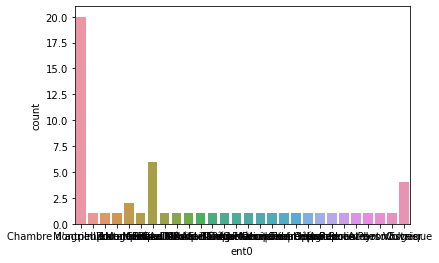

In [55]:
# Ploting
sns.countplot(x = 'ent0', data = corpus_data, orient= 'h' )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TypeError: crosstab() missing 1 required positional argument: 'columns'

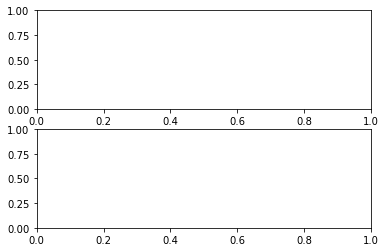

In [61]:
fig, ax = plt.subplots(2,1)
ax = ax.flatten()
tab = pd.crosstab(corpus_data['ent0'])
for i,cat in enumerate(tab.index):
    tab.loc[cat].plot.pie(ax=ax[i],startangle=90)
    ax[i].set_ylabel('')
    ax[i].set_title(cat, fontweight='bold')

In [75]:
corpus_data['ent0'].isna().sum()
len(corpus_data)

73

In [76]:
len(corpus_data)

129

In [84]:
corpus_data['ent0'].value_counts()[:2]

Montpellier    20
Hérault         6
Name: ent0, dtype: int64

In [113]:
corpus_data[corpus_data['ent0'].notnull()].head(2)
# nms.name.notnull()

,name,text,title,pertinence,0,ent0,ent1,ent2,ent3,ent4,ent5,date
0,etablissement_montpellier_supagro_4710.html,* Montpellier\n* 2 place Pierre Viala\n* 34060...,"Montpellier SupAgro, Montpellier (34) - l'Etud...",0.46,NaN,Montpellier,Etudiant,NaN,NaN,NaN,NaN,NaT
1,www.agropolis.fr,###### Compétences de la communauté scientifiq...,AGROPOLIS INTERNATIONAL - Montpellier - Occita...,0.55,NaN,Montpellier,Occitanie,Agriculture,Alimentation,Biodiversite,Environnement,NaT


In [77]:
#### Spatiality
import pandas as pd
import plotly.graph_objects as go

df = pd.DataFrame({'node_names': ['Corpus', 'With_SNE', 'WithOut_SNE'],
                   'node_parent': ["", "Corpus", "Corpus"],
                   'node_labels': ['Agri Corpus<br>Data Spatiality<br>','With_SNE', 'WithOut_SNE'],
                   #'node_counts': [len(corpus),  len(corpus_with_extend), len(corpus_without_extend)]
                   'node_counts': [len(corpus_data), corpus_data['ent0'].isna().sum(), len(corpus_data)- corpus_data['ent0'].isna().sum()]
                  }
                 )


colors = []
for p in df["node_labels"]:
    if p in ["", 'Agri Corpus<br>Data Spatiality<br>']:
        colors.append("white")
    elif p in ['With_SNE']:
        colors.append("green")
    elif p in ["WithOut_SNE"]:
        colors.append("blue")

fig=go.Figure(
    data=go.Sunburst(
        ids=df["node_names"],
        labels=df["node_labels"], 
        parents=df["node_parent"],
        marker=dict(colors=colors_),
        values=df["node_counts"],
        branchvalues="total",
        texttemplate = ('%{label}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}'),
    ),

)
    #fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

    #fig.update_layout(template='none') #dict(font=dict(color='Blue'))
fig.show()

In [91]:
corpus_data['date'].isna().sum()

78

In [104]:
# df2 = pd.to_datetime(df['col1'])
corpus_data['date'] = pd.to_datetime(corpus_data['date']) 
# corpus_data['date']

0                     NaT
1                     NaT
2                     NaT
3     2019-06-17 09:51:28
4                     NaT
              ...        
124                   NaT
125                   NaT
126                   NaT
127                   NaT
128                   NaT
Name: date, Length: 129, dtype: datetime64[ns]

In [126]:
corpus_data_tne = corpus_data[corpus_data['date'].notnull()]
# nms.name.notnull()
corpus_data_tne.head(2)

,name,text,title,pertinence,0,ent0,ent1,ent2,ent3,ent4,ent5,date
3,AGRISCOPIE_PagesRegion_crao2019.pdf,LA RÉGION OCCITANIE A vec une superficie de 72...,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-17 09:51:28
19,espaces_agri_danger_feuilleter_en_ligne_adress...,O utils P réservation des Espaces Agricoles le...,NaN,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-19 14:48:31


In [141]:
range_1 = corpus_data_tne[corpus_data_tne['date']>='2019-01-01']
# range_1

In [142]:
mask = (corpus_data_tne['date'] > '2015-01-01') & (corpus_data_tne['date'] <= '2019-01-01')
range_2 = corpus_data_tne[mask]
# range_2

In [143]:
range_3 = corpus_data_tne[corpus_data_tne['date']<='2015-01-01']
# range_3

In [153]:
def sne_color(df):
    colors = []
    for p in df["node_labels"]:
        if p in ["", 'Agri Corpus<br>Data Spatiality<br>']:
            colors.append("white")
        elif p in ['With_SNE']:
            colors.append("green")
        elif p in ["WithOut_SNE"]:
            colors.append("blue")
            
    return colors

    
def tne_color(df):
    colors = []
    for p in df["node_labels"]:
        if p in ["", 'Agri Corpus<br>Data Temporality<br>']:
            colors.append("white")
        elif p in ["<1 an"]:
            colors.append("blue")
        elif p in ["1 à 5 ans"]:
            colors.append("brown")
        else:
            colors.append("red")
    return colors


In [154]:
def drw_pie(df, colors):
#     colors = tne_color(df)
    fig=go.Figure(
    data=go.Sunburst(
        ids=df["node_names"],
        labels=df["node_labels"], 
        parents=df["node_parent"],
        marker=dict(colors=colors),
        values=df["node_counts"],
        branchvalues="total",
        texttemplate = ('%{label}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}',
                        '%{label}<br>%{percentParent:.1%}'),),)
    fig.show()

In [157]:
#### Spatiality
import pandas as pd
import plotly.graph_objects as go

SNE_NODE = {'node_names': ['Corpus', 'With_SNE', 'WithOut_SNE'],
                   'node_parent': ["", "Corpus", "Corpus"],
                   'node_labels': ['Agri Corpus<br>Data Spatiality<br>','With_SNE', 'WithOut_SNE'],
                   #'node_counts': [len(corpus),  len(corpus_with_extend), len(corpus_without_extend)]
                   'node_counts': [len(corpus_data), corpus_data['ent0'].isna().sum(), len(corpus_data)- corpus_data['ent0'].isna().sum()]
                  }

TNE_NODE = {'node_names': ['Corpus',"WithOut_TNE",'With_TNE', "<1 an", "1 à 5 ans","> 5 ans"],
                   'node_parent': ["", "Corpus", "Corpus", "With_TNE",'With_TNE','With_TNE'],
                   'node_labels': ['Agri Corpus<br>Data Temporality<br>',"WithOut_TNE",'With_TNE',"<1 an", "1 à 5 ans","> 5 ans"],
                   #'node_counts': [len(corpus),  len(corpus_with_extend), len(corpus_without_extend)]
                   'node_counts': [len(corpus_data),len(corpus_data)-len(corpus_data_tne),len(corpus_data_tne), len(range_1), len(range_2),len(range_3)]
                  }

df = pd.DataFrame(TNE_NODE)
# colors = sne_color(df)
colors = tne_color(df)
drw_pie(df,colors)